In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download es_core_news_sm

In [ ]:
!pip install altair pandas

# Procesamiento de texto y creacion de resultados

In [9]:
import spacy
from spacy import displacy

colors = {"LOC": "#FFB700", "MISC":"#F3D850", "ORG": "#889AFD", "PER": "#5C40D0"}

text = """
Margaret Hamilton (Paoli, Indiana, 17 de agosto de 1936) es una científica computacional, matemática e ingeniera de Software estadounidense.
Fue directora de la División de Ingeniería de Software del Laboratorio de Instrumentación del MIT,
donde con su equipo desarrolló el software de navegación "on-board" para el Programa Espacial Apolo.
Fue fundadora, en 1976, de la empresa Higher Order Software.
En 1986, se convirtió en la fundadora y CEO de Hamilton Technologies, en Cambridge, Massachusetts.
"""

nlp = spacy.load("es_core_news_sm")
doc = nlp(text)

options_1 = {"ents": ["LOC", "MISC", "ORG", "PER"], "colors": colors}


In [8]:
import spacy
from spacy import displacy

colors = {"LOC": "#FFB700", "MISC":"#F3D850", "ORG": "#889AFD", "PER": "#5C40D0"}
lines = ["Margaret Hamilton (Paoli, Indiana, 17 de agosto de 1936) es una científica computacional, matemática e ingeniera de Software estadounidense.",
"Fue directora de la División de Ingeniería de Software del Laboratorio de Instrumentación del MIT",
"donde con su equipo desarrolló el software de navegación para el Programa Espacial Apolo.",
"Fue fundadora, en 1976, de la empresa Higher Order Software.",
"En 1986, se convirtió en la fundadora y CEO de Hamilton Technologies, en Cambridge, Massachusetts."]
docs = list(nlp.pipe(lines))
for index, doc in enumerate(docs):
  print(doc.text," NUM LINEA: ",index)



Margaret Hamilton (Paoli, Indiana, 17 de agosto de 1936) es una científica computacional, matemática e ingeniera de Software estadounidense.  NUM LINEA:  0
Fue directora de la División de Ingeniería de Software del Laboratorio de Instrumentación del MIT  NUM LINEA:  1
donde con su equipo desarrolló el software de navegación para el Programa Espacial Apolo.  NUM LINEA:  2
Fue fundadora, en 1976, de la empresa Higher Order Software.  NUM LINEA:  3
En 1986, se convirtió en la fundadora y CEO de Hamilton Technologies, en Cambridge, Massachusetts.  NUM LINEA:  4


In [10]:
entidades = ""
for ent in doc.ents:
      entidades += f"{{text: {ent.text}, start: {ent.start_char}, end: {ent.end_char}, label: {ent.label_}}},"

print(entidades)


{text: Margaret Hamilton, start: 1, end: 18, label: PER},{text: Paoli, start: 20, end: 25, label: LOC},{text: Indiana, start: 27, end: 34, label: LOC},{text: Software estadounidense, start: 117, end: 140, label: MISC},{text: División de Ingeniería de Software, start: 162, end: 196, label: MISC},{text: Laboratorio de Instrumentación, start: 201, end: 231, label: ORG},{text: MIT, start: 236, end: 239, label: ORG},{text: Programa Espacial Apolo, start: 317, end: 340, label: MISC},{text: Higher Order Software, start: 380, end: 401, label: ORG},{text: Hamilton Technologies, start: 450, end: 471, label: PER},{text: Cambridge, start: 476, end: 485, label: LOC},{text: Massachusetts, start: 487, end: 500, label: LOC},


In [11]:
import json

entidades = []
for ent in doc.ents:
    entidad = {
        "text": ent.text,
        "start": ent.start_char,
        "end": ent.end_char,
        "label": ent.label_
    }
    entidades.append(entidad)

entidades_json = json.dumps(entidades, ensure_ascii=False)
print(entidades_json)

[{"text": "Margaret Hamilton", "start": 1, "end": 18, "label": "PER"}, {"text": "Paoli", "start": 20, "end": 25, "label": "LOC"}, {"text": "Indiana", "start": 27, "end": 34, "label": "LOC"}, {"text": "Software estadounidense", "start": 117, "end": 140, "label": "MISC"}, {"text": "División de Ingeniería de Software", "start": 162, "end": 196, "label": "MISC"}, {"text": "Laboratorio de Instrumentación", "start": 201, "end": 231, "label": "ORG"}, {"text": "MIT", "start": 236, "end": 239, "label": "ORG"}, {"text": "Programa Espacial Apolo", "start": 317, "end": 340, "label": "MISC"}, {"text": "Higher Order Software", "start": 380, "end": 401, "label": "ORG"}, {"text": "Hamilton Technologies", "start": 450, "end": 471, "label": "PER"}, {"text": "Cambridge", "start": 476, "end": 485, "label": "LOC"}, {"text": "Massachusetts", "start": 487, "end": 500, "label": "LOC"}]


In [ ]:
# Parse the JSON string into a Python data structure
entidades = json.loads(entidades_json)

# Now you can work with the 'entidades' list
for entidad in entidades:
    print(f"Text: {entidad['text']}, Start: {entidad['start']}, End: {entidad['end']}, Label: {entidad['label']}")

In [13]:
resultado = {
    'texto' : text,
    'detectado': entidades_json,
    'html': "displacy",
    'archivo_origen': "archivo 1",
    'numero_linea': 1,
}

resultados = [resultado]

entidades = json.loads(entidades_json)

# Creacion del dataframe a partir del 'array' de resultados

In [14]:
import json
import pandas as pd

for resultado in resultados:
  entidades = json.loads(resultado['detectado'])
  data = []
  for entidad in entidades:
    data.append({
        'text': entidad['text'],
        'label': entidad['label'],
        'archivo_origen': resultado['archivo_origen'],
        'numero_linea': resultado['numero_linea']
    })
df = pd.DataFrame(data)
df


,text,label,archivo_origen,numero_linea
0,Margaret Hamilton,PER,archivo 1,1
1,Paoli,LOC,archivo 1,1
2,Indiana,LOC,archivo 1,1
3,Software estadounidense,MISC,archivo 1,1
4,División de Ingeniería de Software,MISC,archivo 1,1
5,Laboratorio de Instrumentación,ORG,archivo 1,1
6,MIT,ORG,archivo 1,1
7,Programa Espacial Apolo,MISC,archivo 1,1
8,Higher Order Software,ORG,archivo 1,1
9,Hamilton Technologies,PER,archivo 1,1


In [12]:
ent_text_counts = df['text'].value_counts()
ent_text_counts


Margaret Hamilton                     1
Paoli                                 1
Indiana                               1
Software estadounidense               1
División de Ingeniería de Software    1
Laboratorio de Instrumentación        1
MIT                                   1
Programa Espacial Apolo               1
Higher Order Software                 1
Hamilton Technologies                 1
Cambridge                             1
Massachusetts                         1
Name: text, dtype: int64

In [19]:
# Filter entities with count > 1 to get entities that repeat
repeating_entities = ent_text_counts[ent_text_counts > 1]
repeating_entities
repeating_entities.shape[0]

0

In [9]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>text</th>\n      <th>label</th>\n      <th>archivo_origen</th>\n      <th>numero_linea</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Margaret Hamilton</td>\n      <td>PER</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Paoli</td>\n      <td>LOC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Indiana</td>\n      <td>LOC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Software estadounidense</td>\n      <td>MISC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>División de Ingeniería de Software</td>\n      <td>MISC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Laboratorio de Instrumentación</t

In [20]:
df.to_html(classes='table table-striped table-hover table-sm', index=False)

'<table border="1" class="dataframe table table-striped table-hover table-sm">\n  <thead>\n    <tr style="text-align: right;">\n      <th>text</th>\n      <th>label</th>\n      <th>archivo_origen</th>\n      <th>numero_linea</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Margaret Hamilton</td>\n      <td>PER</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <td>Paoli</td>\n      <td>LOC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <td>Indiana</td>\n      <td>LOC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <td>Software estadounidense</td>\n      <td>MISC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <td>División de Ingeniería de Software</td>\n      <td>MISC</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <td>Laboratorio de Instrumentación</td>\n      <td>ORG</td>\n      <td>archivo 1</td>\n      <td>1</td>\n    </tr>\n    <

# Creacion de graficos con Altair

In [15]:
import json
import pandas as pd
import altair as alt


domain =['PER','LOC','MISC','ORG']
range_= ['#00065D','#99001C','#F94D67','#D2C3C3'] #mi range va a cambiar segun el

# Create an Altair chart
alt.Chart(df, title="Distribucion de entidades").mark_bar().encode(
    x = alt.X('label:N', title='Entidades'),
    y = alt.Y('count():Q', title='N° Apariciones'),
    color = alt.Color('label', scale = alt.Scale(domain=domain, range=range_))
).configure(autosize=alt.AutoSizeParams(resize=True))

alt.Chart(...)

In [17]:
alt.Chart(df, title="Distribucion de entidades").mark_arc().encode(
    theta="count():Q",
    color= alt.Color('label', scale = alt.Scale(domain=domain, range=range_))
)

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X('label:N', title='Entidades'),
    alt.Y('count():Q', title='N° Apariciones')
).to_json(indent=None)

+ Archivo con mas entidades
+ Archivo con mas entidades de cada tipo
+ Entidades que se repiten. (personas, lugares)
+ Resaltado de entidades de un cierto tipo


In [ ]:
label_counts = df['label'].value_counts()
label_counts

LOC     4
MISC    3
ORG     3
PER     2
Name: label, dtype: int64

### Entidades por archivo

In [ ]:
# Group and count entities by file
file_entity_counts = df.groupby('archivo_origen')['text'].count().reset_index()
file_entity_counts.columns = ['archivo_origen', 'entity_count']

# Create a bar chart
chart = alt.Chart(file_entity_counts).mark_bar().encode(
    x=alt.X('archivo_origen:N', title='File'),
    y=alt.Y('entity_count:Q', title='Entity Count'),
    color=alt.Color('archivo_origen:N', title='File'),
    tooltip=['archivo_origen:N', 'entity_count:Q']
).properties(
    title='Entities by File'
).interactive()

chart


alt.Chart(...)

En que linea se encuentran las entidades en cada archivo.

In [ ]:
import altair as alt

# Create a list to store individual scatterplots
scatterplots = []

# Group the DataFrame by 'archivo_origen' (file) and iterate through groups
for file_name, group_df in df.groupby('archivo_origen'):
    scatterplot = alt.Chart(group_df).mark_circle().encode(
        x=alt.X('numero_linea:O', title='Line Number'),
        y=alt.Y('label:N', title='Entity Label'),
        color=alt.Color('label:N', title='Entity Label'),
        tooltip=['label:N', 'numero_linea:O', 'text:N']
    ).properties(
        title=f'Relationship between Line Numbers and Entity Labels in {file_name}'
    ).interactive()

    scatterplots.append(scatterplot)

# Combine individual scatterplots into a single chart
combined_scatterplot = alt.vconcat(*scatterplots)

combined_scatterplot


alt.VConcatChart(...)

### Nube de palabras repetidas

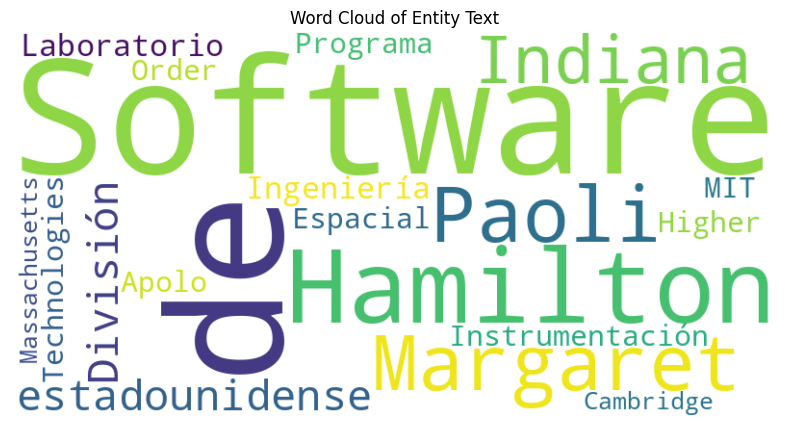

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Combine entity text into a single string
text = ' '.join(df['text'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Entity Text')
plt.show()

wordcloud.to_file('imagen_2.png')



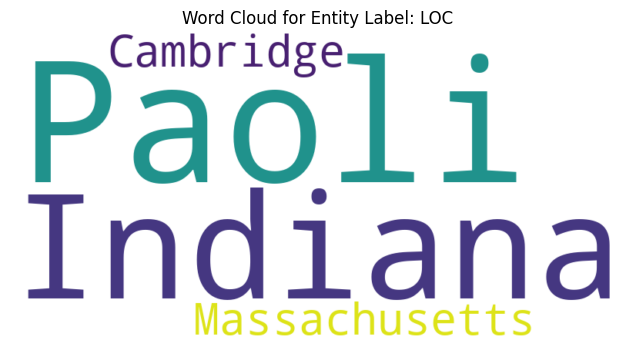

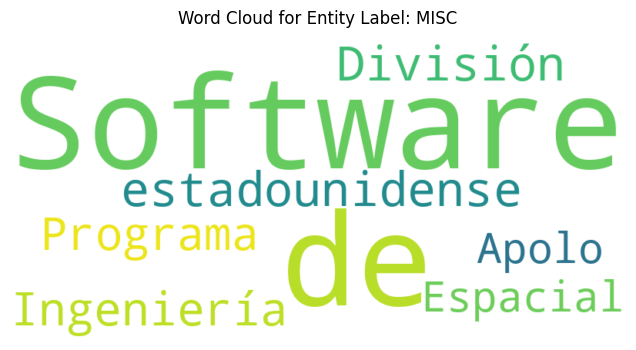

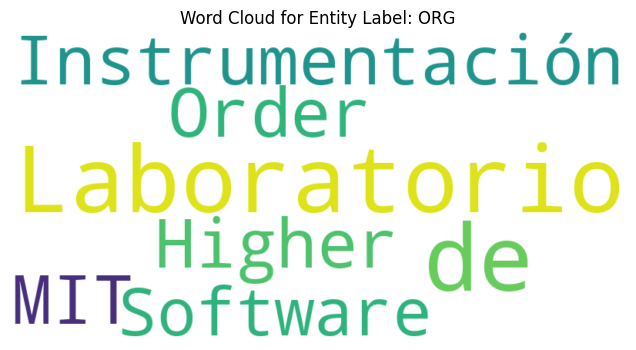

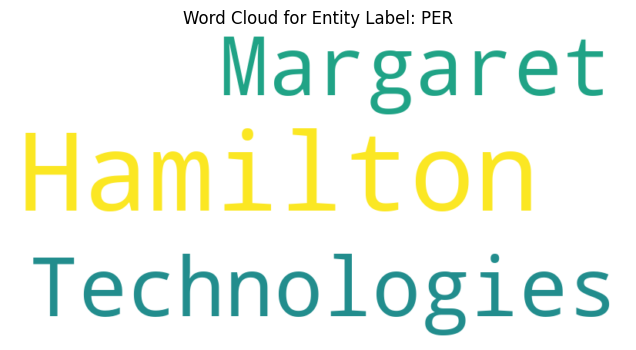

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group entity text by label
text_by_label = df.groupby('label')['text'].apply(lambda x: ' '.join(x))

# Create a word cloud for each label
for label, text in text_by_label.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Entity Label: {label}')
    plt.show()


In [ ]:
import altair as alt

# Group and count entity labels by file
file_label_counts = df.groupby(['archivo_origen', 'label'])['text'].count().reset_index()
file_label_counts.columns = ['archivo_origen', 'label', 'count']

# Create a stacked bar chart
chart = alt.Chart(file_label_counts).mark_bar().encode(
    x=alt.X('archivo_origen:N', title='File'),
    y=alt.Y('count:Q', title='Entity Count'),
    color=alt.Color('label:N', title='Entity Label'),
    tooltip=['archivo_origen:N', 'label:N', 'count:Q']
).properties(
    title='Entity Label Composition by File'
).interactive()

chart


alt.Chart(...)

In [ ]:
output_directory = 'wordcloud_images'


# Group entity text by label
text_by_label = df.groupby('label')['text'].apply(lambda x: ' '.join(x))

# Create a word cloud for each label
for label, text in text_by_label.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Save the word cloud as an image file
    wordcloud.to_file('imagen.png')

    # You can store the image_file_path in your Django models or data structure here
    # For demonstration purposes, I'll store it in a list for now

# Guardado y display

In [ ]:
import json
import pandas as pd
import altair as alt


domain =['PER','LOC','MISC','ORG']
range_= ['#00065D','#99001C','#F94D67','#D2C3C3'] #mi range va a cambiar segun el

# Create an Altair chart
chart = alt.Chart(df, title="Distribucion de entidades").mark_bar().encode(
    x = alt.X('label:N', title='Entidades'),
    y = alt.Y('count():Q', title='N° Apariciones'),
    color = alt.Color('label', scale = alt.Scale(domain=domain, range=range_))
).configure(autosize=alt.AutoSizeParams(resize=True))

chart.to_html()

'<!DOCTYPE html>\n<html>\n<head>\n  <style>\n    .error {\n        color: red;\n    }\n  </style>\n  <script type="text/javascript" src="https://cdn.jsdelivr.net/npm//vega@5"></script>\n  <script type="text/javascript" src="https://cdn.jsdelivr.net/npm//vega-lite@4.17.0"></script>\n  <script type="text/javascript" src="https://cdn.jsdelivr.net/npm//vega-embed@6"></script>\n</head>\n<body>\n  <div id="vis"></div>\n  <script>\n    (function(vegaEmbed) {\n      var spec = {"config": {"view": {"continuousWidth": 400, "continuousHeight": 300}, "autosize": {"resize": true}}, "data": {"name": "data-905af67ebb72603c0dcfbbc8cb2fd8fe"}, "mark": "bar", "encoding": {"color": {"field": "label", "scale": {"domain": ["PER", "LOC", "MISC", "ORG"], "range": ["#00065D", "#99001C", "#F94D67", "#D2C3C3"]}, "type": "nominal"}, "x": {"field": "label", "title": "Entidades", "type": "nominal"}, "y": {"aggregate": "count", "title": "N\\u00b0 Apariciones", "type": "quantitative"}}, "title": "Distribucion de ent

In [ ]:
!pip install altair_viewer

In [ ]:
chart.save('chart.json')
